
# Project: Investigate the TMDB movie dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Dataset: TMDB movies

>The dataset is based on 10,000 movies from The Movie Database (TMDb).

* In the analysis, we will be focusing on one hand on the runtime of the movies and their release year which we will be comparing to earnings and budgets respectively.

>Questions:

* Does the runtime of movies impact their earnings?
* Do newer movies have bigger budgets?

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section, I will load in the data, clean it and remove unnecessary columns and rows.

### General Properties

> Dataset I chose for this analysis: TMDB movies.
> In my analysis, I will focus on top-earning movies and movies with big budgets. I will try to answer which characteristics correspond to a high-earning and big budgets.

In [50]:
#data set loaded
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380


### Data Cleaning 
* Dropped unneeded columns ('cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies')
* Next I discarded missing values
* After that, I set the right date format
* Also I changed the number format which made the numbers more readable
* Next I cleaned the genres column so that it shows only the first genre
* Next step was to clean the duplicates (there was one)
* After that I deleted rows with 0  for 'budgey_adj' and 'revenue_adj'. I reasoned that replacing the values with a mean would distort the data

## In the end I was left with a data frame with 3853 rows and 15 columns

In [51]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000
mean,66064.17743,0.64644,14625701.09415,39823319.79339,102.07086,217.38975,5.97492,2001.32266,17551039.82289,51364363.25325
std,92130.13656,1.00018,30913213.83144,117003486.58209,31.38141,575.61906,0.93514,12.81294,34306155.72284,144632485.03997
min,5.00000,0.00006,0.00000,0.00000,0.00000,10.00000,1.50000,1960.00000,0.00000,0.00000
25%,10596.25000,0.20758,0.00000,0.00000,90.00000,17.00000,5.40000,1995.00000,0.00000,0.00000
50%,20669.00000,0.38386,0.00000,0.00000,99.00000,38.00000,6.00000,2006.00000,0.00000,0.00000
75%,75610.00000,0.71382,15000000.00000,24000000.00000,111.00000,145.75000,6.60000,2011.00000,20853251.08440,33697095.71731
max,417859.00000,32.98576,425000000.00000,2781505847.00000,900.00000,9767.00000,9.20000,2015.00000,425000000.00000,2827123750.41189


In [52]:
df.shape

(10866, 21)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [54]:
#dropped unused columns
df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)

In [55]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380


In [56]:
# dropped missing values
df.dropna(inplace=True)

In [57]:
# changed date format
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

In [58]:
# changed number format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10796 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10796 non-null  int64         
 1   imdb_id         10796 non-null  object        
 2   popularity      10796 non-null  float64       
 3   budget          10796 non-null  int64         
 4   revenue         10796 non-null  int64         
 5   original_title  10796 non-null  object        
 6   director        10796 non-null  object        
 7   runtime         10796 non-null  int64         
 8   genres          10796 non-null  object        
 9   release_date    10796 non-null  datetime64[ns]
 10  vote_count      10796 non-null  int64         
 11  vote_average    10796 non-null  float64       
 12  release_year    10796 non-null  int64         
 13  budget_adj      10796 non-null  float64       
 14  revenue_adj     10796 non-null  float64       
dtypes:

In [65]:
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')

In [66]:
genres_df.query('original_title == "Jurassic World"')

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.50000,2015,137999939.28003,1392445892.52380
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.50000,2015,137999939.28003,1392445892.52380
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.50000,2015,137999939.28003,1392445892.52380
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.50000,2015,137999939.28003,1392445892.52380


In [67]:
def split(column):
    x = column.split('|')[0]
    return x

In [68]:
df['genres'] = df['genres'].apply(lambda x: split(x))

In [69]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.50000,2015,137999939.28003,1392445892.52380


In [70]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10796.00000,10796.00000,10796.00000,10796.00000,10796.00000,10796.00000,10796.00000,10796.00000,10796.00000,10796.00000
mean,65558.31808,0.64961,14719366.67182,40080510.64052,102.21332,218.68164,5.97030,2001.28677,17663691.65299,51696371.84669
std,91747.96902,1.00258,30991238.22095,117338430.76150,30.76277,577.25738,0.93292,12.82103,34388506.64822,145041642.43934
min,5.00000,0.00019,0.00000,0.00000,0.00000,10.00000,1.50000,1960.00000,0.00000,0.00000
25%,10568.50000,0.20920,0.00000,0.00000,90.00000,17.00000,5.40000,1995.00000,0.00000,0.00000
50%,20454.00000,0.38551,0.00000,0.00000,99.00000,39.00000,6.00000,2006.00000,0.00000,0.00000
75%,74663.50000,0.71772,16000000.00000,24609991.25000,112.00000,147.00000,6.60000,2011.00000,21033371.65263,34097666.53813
max,417859.00000,32.98576,425000000.00000,2781505847.00000,900.00000,9767.00000,9.20000,2015.00000,425000000.00000,2827123750.41189


In [71]:
df.query('budget_adj == 0').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5632 entries, 30 to 10864
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              5632 non-null   int64         
 1   imdb_id         5632 non-null   object        
 2   popularity      5632 non-null   float64       
 3   budget          5632 non-null   int64         
 4   revenue         5632 non-null   int64         
 5   original_title  5632 non-null   object        
 6   director        5632 non-null   object        
 7   runtime         5632 non-null   int64         
 8   genres          5632 non-null   object        
 9   release_date    5632 non-null   datetime64[ns]
 10  vote_count      5632 non-null   int64         
 11  vote_average    5632 non-null   float64       
 12  release_year    5632 non-null   int64         
 13  budget_adj      5632 non-null   float64       
 14  revenue_adj     5632 non-null   float64       
dtypes:

In [72]:
# duplicates 
sum(df.duplicated())

1

In [73]:
df.shape

(10796, 15)

In [74]:
# dropped duplicates 
df.drop_duplicates(keep ='first', inplace=True)

In [75]:
df.shape

(10795, 15)

In [76]:
# deleted rows with 0 in 'budget_adj' column
df = df[df['budget_adj'] != 0]

In [77]:
df.shape

(5163, 15)

In [78]:
# deleted rows with 0 in 'revenue_adj' column
df = df[df['revenue_adj'] != 0]

In [24]:
df.shape

(3853, 15)

<a id='eda'></a>
## Exploratory Data Analysis

> Now that my data is clean I will research my questions.

## Does the runtime of movies impact their earnings?

In [25]:
df['earnings'] = df['revenue_adj'] - df['budget_adj']

In [26]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,earnings
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.50000,2015,137999939.28003,1392445892.52380,1254445953.24377


In [27]:
df.shape

(3853, 16)

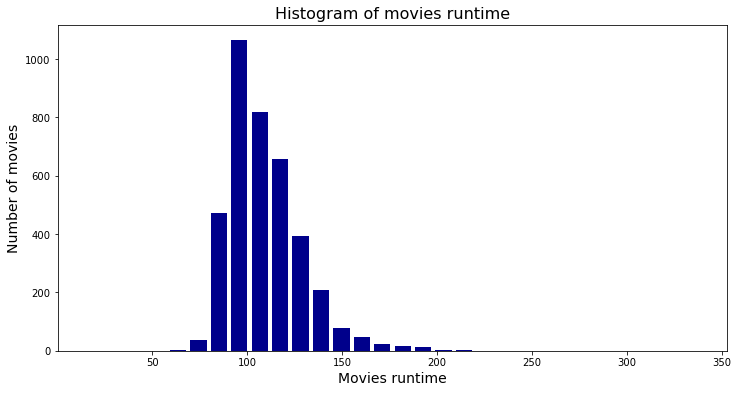

In [28]:
plt.figure(figsize=(12,6))

plt.xlabel('Movies runtime', fontsize=14)
plt.ylabel('Number of movies', fontsize=14)
plt.title('Histogram of movies runtime', fontsize=16)
plt.hist(df['runtime'], rwidth = 0.8, bins=30, color='darkblue')
plt.show()

#### We can see that the runtime distribution is skewed to the right. Most of the movies have a runtime of 90 - 100 minutes.

In [29]:
df.runtime.describe()

count   3853.00000
mean     109.20893
std       19.91291
min       15.00000
25%       95.00000
50%      106.00000
75%      119.00000
max      338.00000
Name: runtime, dtype: float64

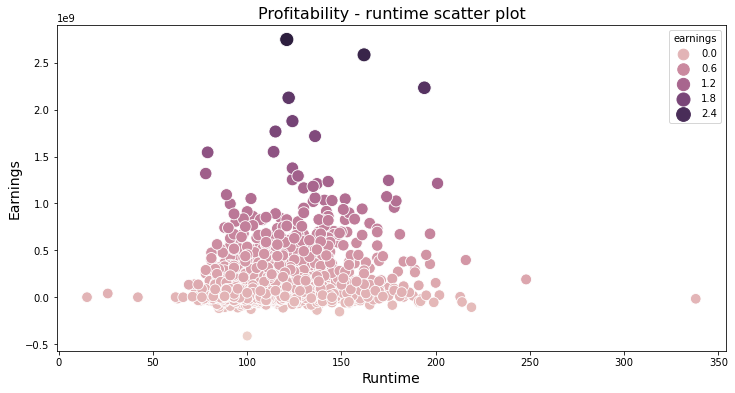

In [30]:
plt.figure(figsize=(12,6))

plt.xlabel('Runtime', fontsize=14)
plt.ylabel('Earnings', fontsize=14)
plt.title('Profitability - runtime scatter plot', fontsize=16)

sns.scatterplot('runtime', 'earnings', data=df, hue='earnings', size='earnings', sizes=(100, 200))
plt.show()

#### Above we can see a scatter plot of runtime and earnings. From the graph above we can see that the most profitable movies have a runtime greater than the mean runtime. Let's analyze it a little bit more by selecting only the top-earning movies.

In [31]:
# created a new df only for the 100 to earners
top_100_earnings = df.sort_values(by=['earnings'], ascending = False).head(100)

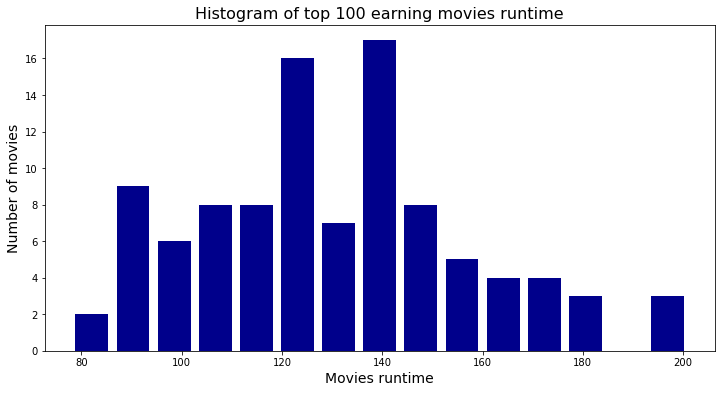

In [32]:
plt.figure(figsize=(12,6))

plt.xlabel('Movies runtime', fontsize=14)
plt.ylabel('Number of movies', fontsize=14)
plt.title('Histogram of top 100 earning movies runtime', fontsize=16)
plt.hist(top_100_earnings['runtime'], rwidth = 0.8, bins=15, color='darkblue')
plt.show()

#### We can see from the graph above that the runtime distribution is different for top earners. It is still skewed to the right but not so much so. The biggest difference is that in this histogram most of the top-earning movies have a runtime of 140 min compared to 100 for all analyzed movies. The runtime mean for top earners is 130 minutes vs 109 for all analyzed movies.

In [33]:
top_100_earnings.runtime.describe()

count   100.00000
mean    130.50000
std      26.66231
min      78.00000
25%     113.00000
50%     129.50000
75%     145.25000
max     201.00000
Name: runtime, dtype: float64

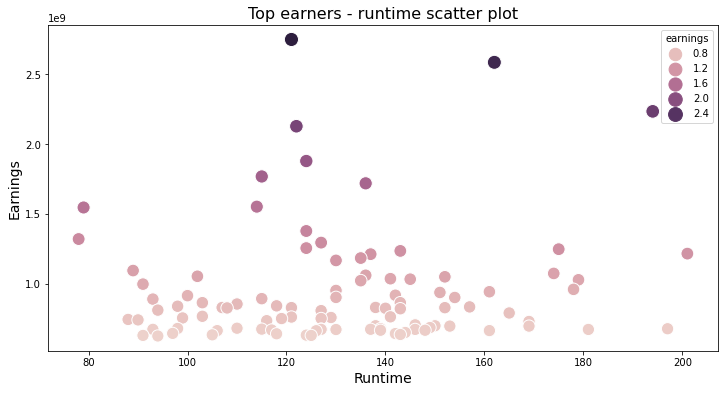

In [34]:
plt.figure(figsize=(12,6))

plt.xlabel('Runtime', fontsize=14)
plt.ylabel('Earnings', fontsize=14)
plt.title('Top earners - runtime scatter plot', fontsize=16)

sns.scatterplot('runtime', 'earnings', data=top_100_earnings, hue='earnings', size='earnings', sizes=(150, 200))

# plt.scatter(top_100_earnings['runtime'], top_100_earnings['earnings'])
plt.show()

#### When looking at the graph above we can see that most of the top-earning movies have a runtime greater than 130 minutes. 

### We can say that although runtime does not determine that a movie will be profitable (there are movies that are long and did not earn too much or even had a loss), we can conclude that longer movies have a better chance of being profitable. This may be connected with the fact that blockbusters are generally long and and have big budgets.

## Do newer movies have bigger budgets?

In [35]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,earnings
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.50000,2015,137999939.28003,1392445892.52380,1254445953.24377


In [87]:
bins = len(df['release_year'].unique())

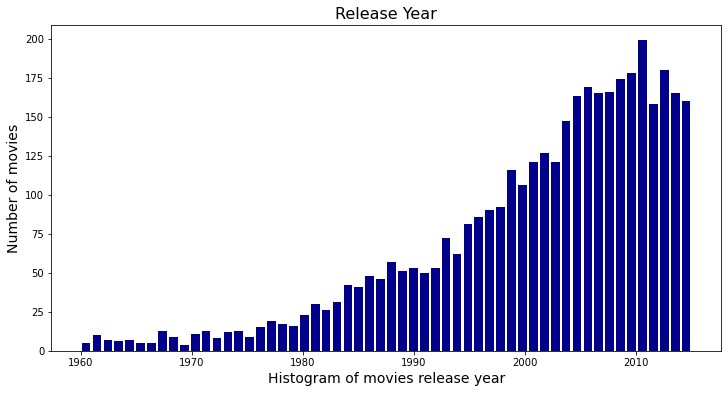

In [88]:
plt.figure(figsize=(12,6))

plt.xlabel('Histogram of movies release year', fontsize=14)
plt.ylabel('Number of movies', fontsize=14)
plt.title('Release Year', fontsize=16)
plt.hist(df['release_year'], rwidth = 0.8, bins=bins, color='darkblue')
plt.show()

#### We can see that the distribution is heavily skewed to the left which is understandable - more and more movies are released every year.

In [37]:
df.release_year.describe()

count   3853.00000
mean    2001.25928
std       11.28352
min     1960.00000
25%     1995.00000
50%     2004.00000
75%     2010.00000
max     2015.00000
Name: release_year, dtype: float64

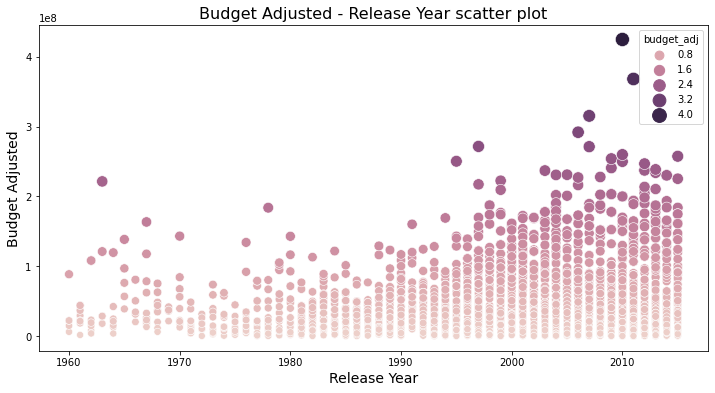

In [38]:
plt.figure(figsize=(12,6))

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Budget Adjusted', fontsize=14)
plt.title('Budget Adjusted - Release Year scatter plot', fontsize=16)
# plt.scatter(df['release_year'], df['earnings'])
sns.scatterplot('release_year', 'budget_adj', data=df, hue='budget_adj', size='budget_adj', sizes=(50, 200))

plt.show()

#### Above we can see a scatter plot of release year and budget adjusted. There is a clear indication that movies released after 1995 have a bigger budget. We can see that the movies that had the biggest budgets were released after 1995. It is worth mentioning that I'm using the budget adjusted values which means inflation did not impact the results.

Text(0.5, 1.0, 'Average Popularity of Genres')

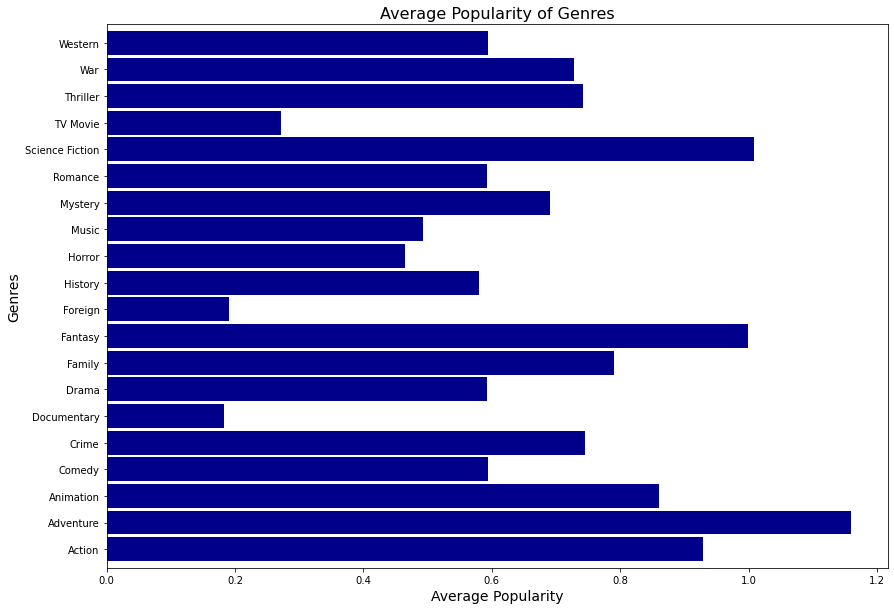

In [84]:
genres_df.groupby('genres').popularity.mean().plot.barh(color='darkblue', figsize=(14,10), width = 0.9);

plt.xlabel('Average Popularity', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.title('Average Popularity of Genres', fontsize=16)

#### Above we see a aditional analysis of average popularity by genre. I used the data that was grouped in one column. afther exploding it which created many rows for same movie i was able to make a proper analysis of the most popular genre.

<a id='conclusions'></a>
## Conclusions

> To answer the first question we can say that: longer movies have a better chance of being profitable. 

> Answering the second question we can definitely say the newer movies have bigger budgets.

## Limitations:

> 1. We base most of our analysis on the budget_adj and revenue_adj columns. Unoftunetly we don't how they were adjusted - what were the exact assumptions. If we knew the exact calculation we could have adjusted our analysis accordingly.
> 2. Due to many rows of missing data for budget and revenue, we had to drop around 7000 rows which are not very good for our analysis. This limitation decreased the accuracy of the analysis tremendously.
> 3. The last limitation in my opinion is that data is not updated. In recent years a lot has changed in the movie industry. The newest movies in the data set are from 2015.